Alice wins: 4571
Bob wins: 4863
Bob does better
Alice's average score: 24.7659
Bob's average score: 24.742
Variance of Alice's score: 30.82229719
Variance of Bob's score: 6.3396360000000005
Max of Alice's score: 48
Max of Bob's score: 34
Alice's average margin: 6.0
Bob's average margin: 4.0


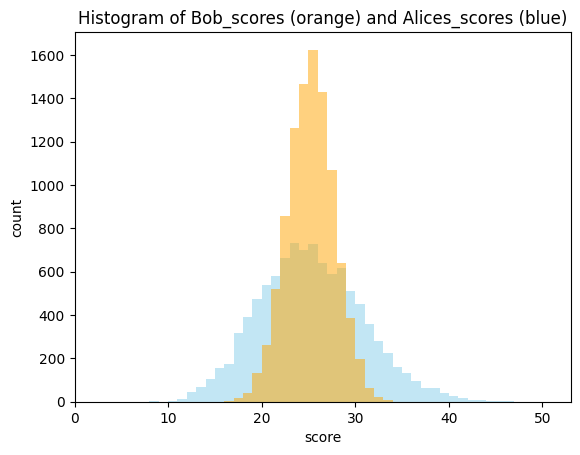

In [6]:
import numpy as np
from itertools import pairwise
from matplotlib import pyplot as plt

experiment = {}
keys = list(range(10000))
Alice_wins = 0
Bob_wins = 0
Alice_scores = []
Bob_scores = []
Alice_margins = []
Bob_margins = []

for j in keys:
    
    coin = np.random.binomial(n=1, p=0.5, size=100)
    Bob_score = 0
    Alice_score = 0

    # Alice gets one point for HH
    for x in pairwise(coin):
        if x == (1,1): 
          Alice_score = Alice_score + 1

    # Bob gets one point for HT
    for x in pairwise(coin):
        if x == (1,0): 
          Bob_score = Bob_score + 1
    
    if Alice_score > Bob_score:
        Alice_wins = Alice_wins + 1
        Alice_margin = Alice_score - Bob_score
        Alice_margins.append(Alice_margin)

    if Bob_score > Alice_score:
        Bob_wins = Bob_wins + 1
        Bob_margin = Bob_score - Alice_score
        Bob_margins.append(Bob_margin)

    Alice_scores.append(Alice_score)
    Bob_scores.append(Bob_score)

print("Alice wins:", Alice_wins)
print("Bob wins:", Bob_wins)

if Alice_wins > Bob_wins:
    print("Alice does better")

if Bob_wins > Alice_wins:
    print("Bob does better")

print("Alice's average score:", np.mean(Alice_scores))
print("Bob's average score:", np.mean(Bob_scores))
print("Variance of Alice's score:", np.var(Alice_scores))
print("Variance of Bob's score:", np.var(Bob_scores))
print("Max of Alice's score:", np.max(Alice_scores))
print("Max of Bob's score:", np.max(Bob_scores))
print("Alice's average margin:", np.mean(Alice_margin))
print("Bob's average margin:", np.mean(Bob_margin))

bins = np.arange(-100, 100, 1) # fixed bin size

plt.xlim([min(Alice_scores)-5, max(Alice_scores)+5])

plt.hist(Alice_scores, bins=bins, alpha=0.5, color="skyblue")
plt.hist(Bob_scores, bins=bins, alpha=0.5, color ="orange")
plt.title('Histogram of Bob_scores (orange) and Alices_scores (blue)')
plt.xlabel('score')
plt.ylabel('count')

plt.show()
